In [23]:
import permutationTest as pt 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import pickle

In [24]:
sampleShape = [10,50,100,150,200,250,300,400,500]
n_samples = 5
bins =  500
mean =0.2
std = 1

data_variables = (sampleShape, n_samples, bins, mean, std)

In [25]:
data_generator = lambda mean, std, size ,n_samples : [np.random.normal(mean, std, size) for _ in range(n_samples)]


In [26]:
def runExperiment(method_list, names_list, data_generator, data_variables):
    sampleShape, n_samples, bins, mean, std = data_variables
    
    method_dict = dict()
    
    for method, name in zip(method_list, names_list):
        
        method_dict[name] = dict()
        method_dict[name]["p_values"] = list()
        method_dict[name]["time"] = list()
        
        for i in range(n_samples):
            
            np.random.seed(i)
            
            for size in sampleShape:
                
                A = np.asarray(data_generator(mean, std, size ,1))
                B = np.asarray(data_generator(mean, std, size ,1))
        
                start = time.time()
                method_dict[name]["p_values"].append(method(A,B,bins)[0])
                end = time.time()
                method_dict[name]["time"].append(end - start)
            
    return method_dict
    

In [27]:
method_list = [pt.GreenFloatCuda]
names_list = ["RTX2070"]
RTX2070_dict = runExperiment(method_list, names_list, data_generator, data_variables)

In [28]:
pickle.dump(RTX2070_dict,open("./experiment_data/experiment2/RTX2070_dict.pkl", "wb"))

In [14]:
!ls "experiment_data/experiment2"

RTX2060_dict.pkl  RTX2070_dict.pkl  TITANX_dict.pkl


In [33]:
RTX2060_dict = pickle.load(open("experiment_data/experiment2/RTX2060_dict.pkl", "rb"))
RTX2070_dict = pickle.load(open("experiment_data/experiment2/RTX2070_dict.pkl", "rb"))
TITANX_dict = pickle.load(open("experiment_data/experiment2/TITANX_dict.pkl", "rb"))

In [55]:
def preparePandas(timeData, sampleSizes, name):
    """Create DF for sns-plots"""
    preparePd = list()
    for time, sample in zip(timeData, sampleSizes):
        preparePd.append([str(name),time, sample])
        
            
    return preparePd

def timePlotSNS(TimeList_list, NameList, sampleShape, y_label , x_label ,log=False, path=None):
    """Create SNS timeseries-plot"""
    a4_dims = (11.7/1.5, 8.27/1.5)
    fig, ax = plt.subplots(figsize=a4_dims)
    

    
    sns.set(style="white")
    sns.set_context("talk")
    
    for i, (time_list, name) in enumerate(zip(TimeList_list, NameList)):
        if log:
            df = preparePandas(np.log10(time_list), sampleShape, name)
        else:
            df = preparePandas(time_list, sampleShape, name)
            
        if i ==0:
            data = df
        else:
            data += df
            
    pdData = pd.DataFrame(data, columns=['Method', y_label,'bins'])
    

    if log:        
        MAX = max(pdData[y_label])
        MIN = min(pdData[y_label])

        RANGE = np.arange(np.floor(MIN), np.ceil(MAX))
        snsPlot = sns.lineplot(x="bins", y=y_label,
             hue="Method",
             data=pdData)#.set(yticks = RANGE, yticklabels=10**RANGE)
        plt.yticks(RANGE, 10.0**RANGE)
        
        
    else:
        snsPlot = sns.lineplot(x="bins", y=y_label,
             hue="Method",
             data=pdData,)
    

    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    
    
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:])
    
    plt.setp(snsPlot.get_legend().get_texts(), fontsize=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.tight_layout()
    
    
    
    if path:   
        fig = snsPlot.get_figure()
        fig.savefig(path)

In [56]:
TimeList_list = [RTX2060_dict["RTX2060"]["time"], 
                 RTX2070_dict["RTX2070"]["time"],
                 TITANX_dict["TITANX"]["time"]
                ]
NameList = ["RTX2060", "RTX2070", "TITANX"]

In [57]:
rep_samples = sampleShape * n_samples

In [58]:
!ls

'Experiment 1 – Time Vs bins.ipynb'	   __pycache__
'Experiment 2 – GPU comparison.ipynb'	   experiment_data
'Experiment 3 – Memory test.ipynb'	   figures
'Experiment 4 – Memory allocation.ipynb'   utils2.py
 Untitled.ipynb


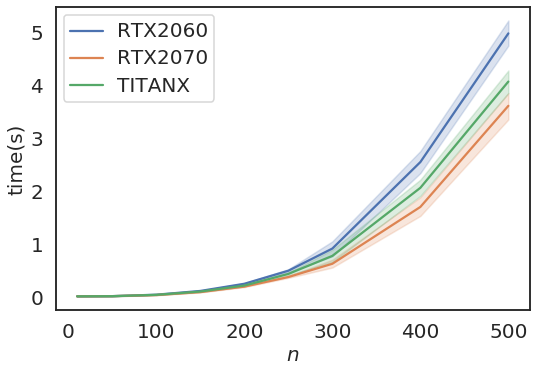

In [59]:
timePlotSNS(TimeList_list, NameList, rep_samples, 'time(s)',  r"$n$", path="./figures/experiemnt2/GPU_comparison")